Presenting how the data (in this case, the u-wind component for different altitudes, longitudes and latitidues) can be visualized using the matplotlib basemap toolkit

In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [3]:
nc.variables

OrderedDict([('time', <scipy.io.netcdf.netcdf_variable at 0x1f74cd65e48>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x1f74cd65ef0>),
             ('longitude', <scipy.io.netcdf.netcdf_variable at 0x1f74cd65e80>),
             ('latitude', <scipy.io.netcdf.netcdf_variable at 0x1f74cd65fd0>),
             ('level', <scipy.io.netcdf.netcdf_variable at 0x1f74cd72128>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x1f74cd72278>)])

In [4]:
nc.dimensions

OrderedDict([('time', None),
             ('bnds', 2),
             ('longitude', 512),
             ('latitude', 256),
             ('level', 37)])

In [5]:
times = nc.variables["time"]
u = nc.variables["u"]

In [6]:
u.shape

(12, 37, 256, 512)

In [7]:
times.shape

(12,)

In [8]:
u[0, 0, 0, 0]

-34.00075

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


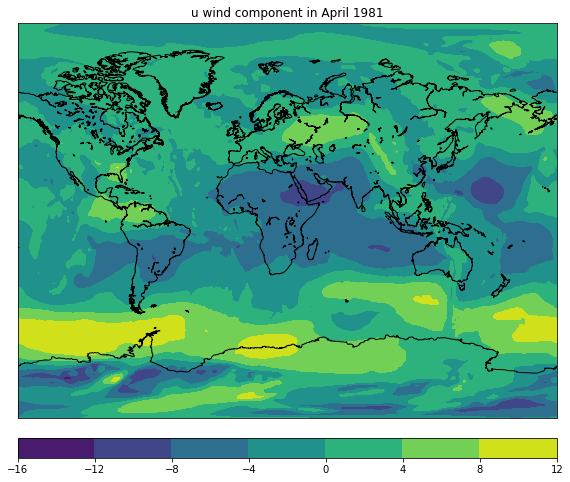

In [9]:
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, np.flipud(u[4,-1,:,:])) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("u wind component in April 1981")
plt.show()

<h2>Plotting the u wind component for every month in 1981</h2>

In [10]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


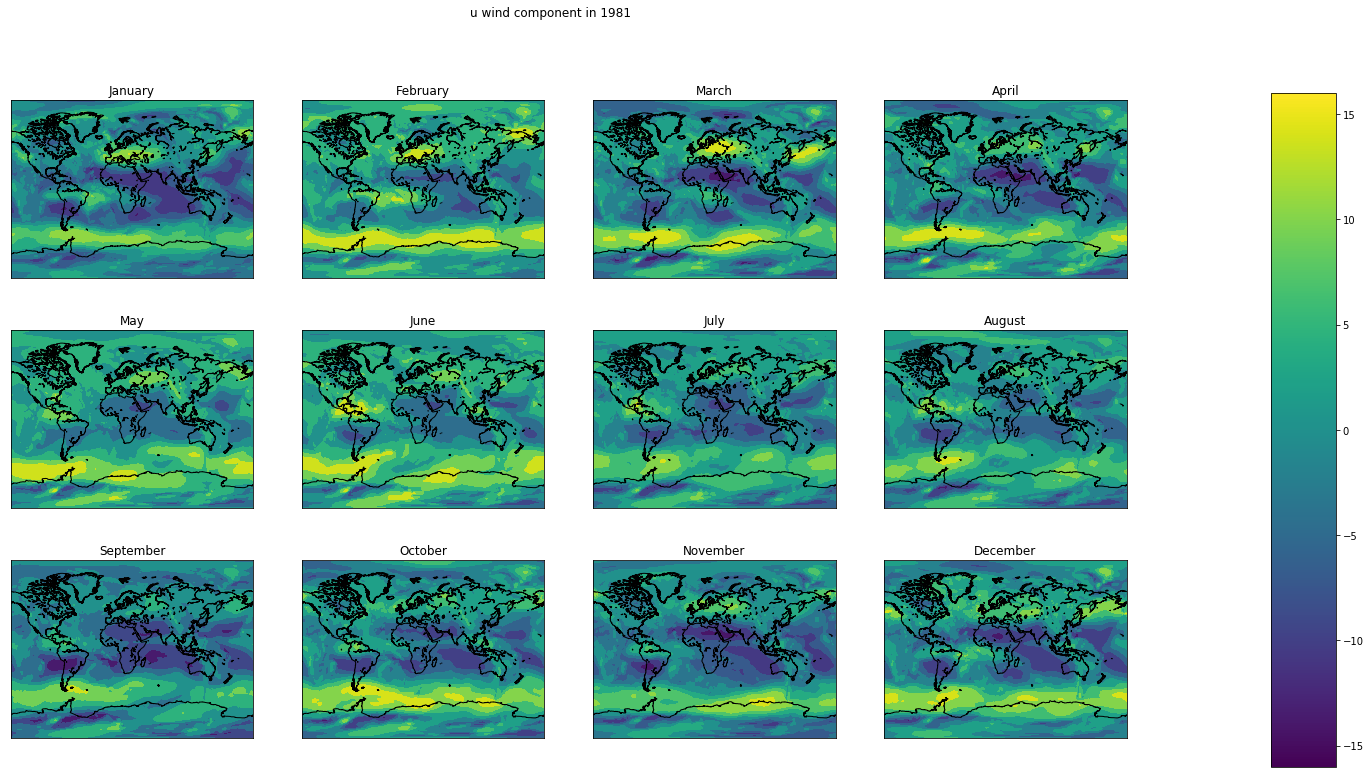

In [11]:
norm = matplotlib.colors.Normalize(vmin=-16, vmax=16, clip=True)
mapper= matplotlib.cm.ScalarMappable(norm=norm)

fig, axes =plt.subplots(figsize = (20,12), nrows=3, ncols=4)

for i, ax in enumerate(axes.flat):
    m = Basemap(projection='mill',lon_0=30,resolution='l', ax=ax)
    m.drawcoastlines()

    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    cs = m.contourf(x, y, np.flipud(u[i, -1, :, :])) # variate 2nd dimension for different altitudes, -1 is ground level
    ax.set_title(months[i])
    
fig.suptitle("u wind component in 1981")
plt.colorbar(mapper, cax=plt.axes([1, 0.1, 0.045, 0.78]))
plt.show()

<h2>Plotting the u wind component for different levels in February 1981</h2>

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


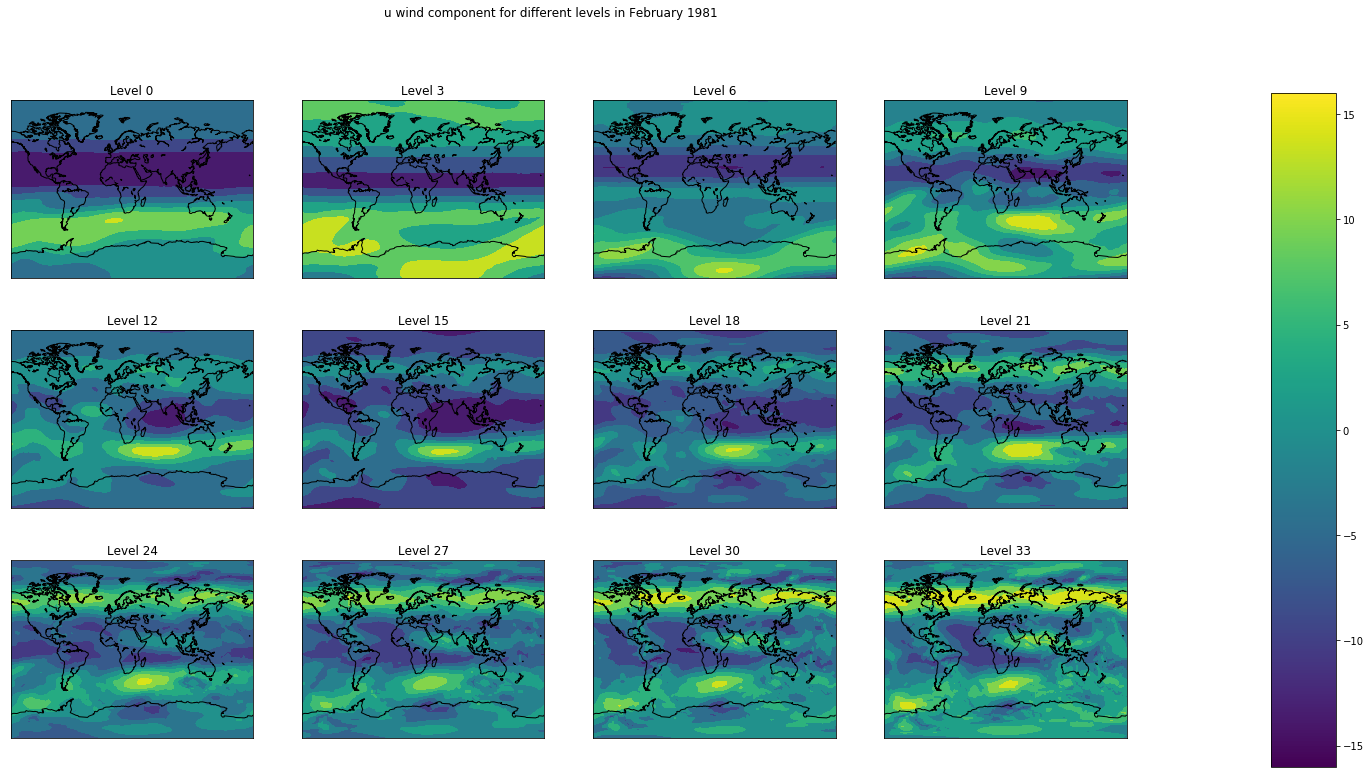

In [13]:
fig, axes =plt.subplots(figsize = (20,12), nrows=3, ncols=4)

for i, ax in enumerate(axes.flat):
    level = i * 3
    m = Basemap(projection='mill',lon_0=30,resolution='c', ax=ax)
    m.drawcoastlines()

    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    cs = m.contourf(x, y, np.fliplr(u[1, level, :, :])) # variate 2nd dimension for different altitudes, -1 is ground level
    ax.set_title("Level " + str(level))
    
fig.suptitle("u wind component for different levels in February 1981")
plt.colorbar(mapper, cax=plt.axes([1, 0.1, 0.045, 0.78]))
plt.show()